In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight

In [59]:
import tensorflow as tf
print(tf.__version__)

print("GPU Available:", tf.config.list_physical_devices('GPU'))


2.10.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Arrhythmia Dataset
Number of Samples: 109446

Number of Categories: 5

Sampling Frequency: 125Hz

Data Source: Physionet's MIT-BIH Arrhythmia Dataset

Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

In [60]:
train_df = pd.read_csv('mitbih_train.csv',header=None)
test_df = pd.read_csv('mitbih_test.csv',header=None)

In [61]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [62]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [63]:
train_df[train_df.shape[1]-1].unique()

array([0., 1., 2., 3., 4.])

In [64]:
class_labels = train_df[train_df.shape[1]-1].unique()
class_labels

array([0., 1., 2., 3., 4.])

In [65]:
class_names = {0: 'N', 
               1: 'S', 
               2: 'V', 
               3: 'F', 
               4: 'Q'}

In [66]:
train_df[187].value_counts()


187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

In [67]:

test_df[187].value_counts()

187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64

In [68]:
X_train = train_df.drop(columns = [187])
y_train = train_df[187]


In [69]:
train_df.shape


(87554, 188)

In [70]:
test_df.shape


(21892, 188)

In [71]:
df_1 = train_df[train_df[187] == 1]
df_2 = train_df[train_df[187] == 2]
df_3 = train_df[train_df[187] == 3]
df_4 = train_df[train_df[187] == 4]

In [72]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)
df_0_downsample = train_df[train_df[187]==0].sample(n =20000, random_state=123)
train_df = pd.concat([df_0_downsample, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [73]:
df_1_t = test_df[test_df[187] == 1]
df_2_t = test_df[test_df[187] == 2]
df_3_t = test_df[test_df[187] == 3]
df_4_t = test_df[test_df[187] == 4]

In [74]:
df_1_upsample_t = resample(df_1, n_samples = 5000, replace = True, random_state = 123)
df_2_upsample_t = resample(df_2, n_samples = 5000, replace = True, random_state = 123)
df_3_upsample_t = resample(df_3, n_samples = 5000, replace = True, random_state = 123)
df_4_upsample_t = resample(df_4, n_samples = 5000, replace = True, random_state = 123)
df_0_t = test_df[test_df[187]==0].sample(n =5000, random_state=123)
test_df = pd.concat([df_0_t, df_1_upsample_t, df_2_upsample_t, df_3_upsample_t, df_4_upsample_t])


In [75]:
print(train_df[187].value_counts())
print(len(train_df[187].value_counts()))
print(test_df[187].value_counts())
print(len(test_df[187].value_counts()))

187
0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: count, dtype: int64
5
187
0.0    5000
1.0    5000
2.0    5000
3.0    5000
4.0    5000
Name: count, dtype: int64
5


In [76]:
X_train = train_df.drop(columns = [187])
y_train = train_df[187]

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Separate features and target variable for test dataset
X_test = test_df.drop(columns=[187])
y_test = test_df[187]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)
# Transform the valid data using the fitted scaler
X_valid_normalized = scaler.transform(X_valid)
# Transform the test data using the fitted scaler
X_test_normalized = scaler.transform(X_test)




In [78]:
print("Before Normalization:")
X_train.head(5)


Before Normalization:


,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
80646,1.000000,0.980880,0.600382,0.288719,0.181644,0.133843,0.114723,0.091778,0.082218,0.070746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76808,0.000000,0.018006,0.056787,0.135734,0.218837,0.270083,0.326870,0.351801,0.405817,0.518006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79759,0.000000,0.067395,0.131148,0.265938,0.404372,0.495446,0.557377,0.615665,0.677596,0.744991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34449,1.000000,0.940141,0.753521,0.362676,0.154930,0.102113,0.070423,0.031690,0.007042,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82406,0.845488,0.756490,0.653894,0.579728,0.489493,0.396786,0.307787,0.228677,0.158220,0.122373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
train_df.shape

(100000, 188)

In [80]:

print("After Normalization:")
X_train_normalized[:, 5]

After Normalization:


array([-0.63168238,  0.02333511,  1.1068417 , ..., -0.36334828,
       -0.47853169, -0.54738713])

In [81]:
test_df.shape

(25000, 188)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

def create__model():
    _model = Sequential([
        LSTM(64, input_shape=(187,1), return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dense(128, activation='relu'),
        Dropout(0.1),  # Adding dropout for regularization
        Dense(5, activation='softmax')
    ])
    # Compile the model
    _model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return _model


# Create the  model
_model = create__model()


# Print the model summary
_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 187, 64)           16896     
                                                                 
 dropout (Dropout)           (None, 187, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 58,885
Trainable params: 58,885
Non-traina

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# Train the model
history = model.fit(X_train_normalized.reshape(-1, 187, 1), y_train, epochs=150, batch_size=128, validation_data=(X_valid_normalized, y_valid), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_valid_normalized, y_valid)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Epoch 1/150
625/625 [==============================] - 29s 33ms/step - loss: 1.1717 - accuracy: 0.5245 - val_loss: 0.9822 - val_accuracy: 0.6271
Epoch 2/150
625/625 [==============================] - 20s 32ms/step - loss: 1.0430 - accuracy: 0.5946 - val_loss: 0.9720 - val_accuracy: 0.6190
Epoch 3/150
625/625 [==============================] - 21s 33ms/step - loss: 1.0003 - accuracy: 0.6129 - val_loss: 0.8730 - val_accuracy: 0.6664
Epoch 4/150
625/625 [==============================] - 21s 34ms/step - loss: 0.9357 - accuracy: 0.6425 - val_loss: 0.9796 - val_accuracy: 0.6161
Epoch 5/150
625/625 [==============================] - 21s 34ms/step - loss: 0.9746 - accuracy: 0.6280 - val_loss: 0.8228 - val_accuracy: 0.6888
Epoch 6/150
625/625 [==============================] - 22s 35ms/step - loss: 0.9905 - accuracy: 0.6119 - val_loss: 0.9971 - val_accuracy: 0.6079
Epoch 7/150
625/625 [==============================] - 22s 34ms/step - loss: 0.9425 - accuracy: 0.6317 - val_loss: 0.8266 - val_ac

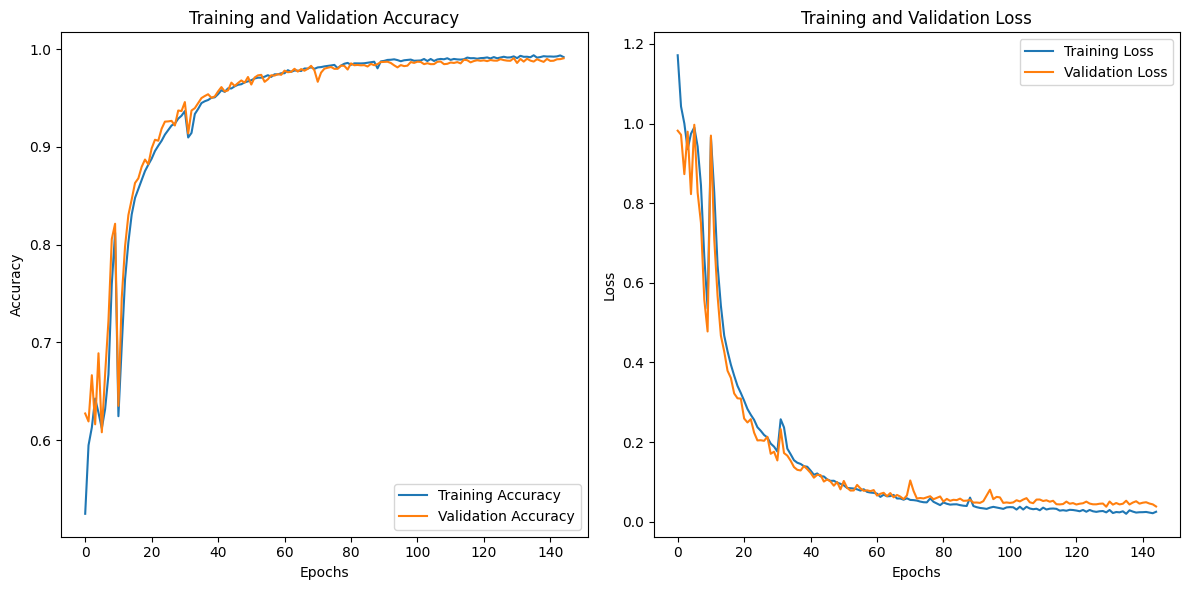

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_.history['accuracy'], label='Training Accuracy')
plt.plot(history_.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_.history['loss'], label='Training Loss')
plt.plot(history_.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


782/782 [==============================] - 9s 12ms/step


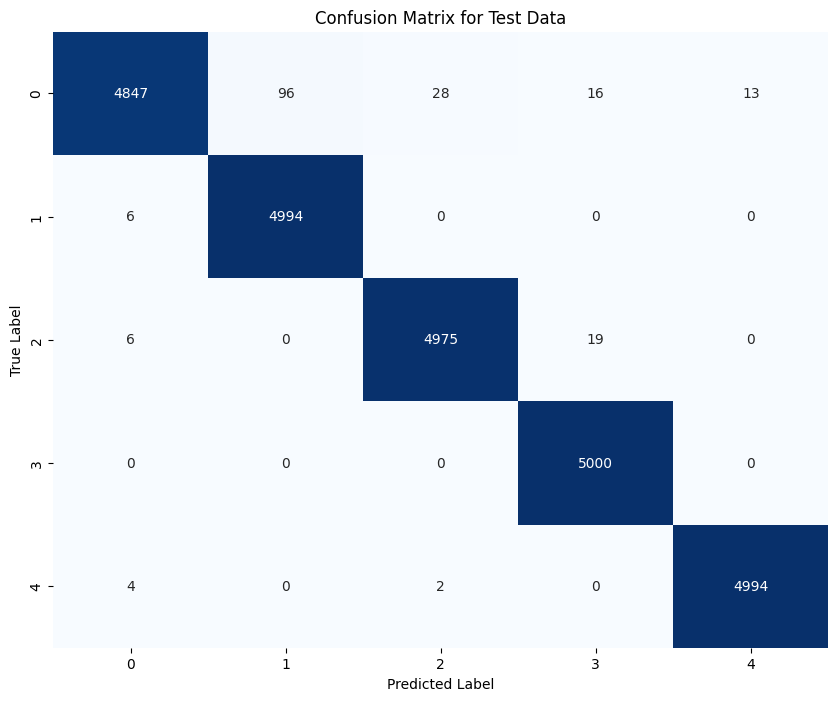

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Make predictions on the test data
y_pred_test_prob_ = _model.predict(X_test_normalized)
y_pred_test_classes_ = np.argmax(y_pred_test_prob_, axis=1)  # Convert probabilities to class labels

# Initialize OneHotEncoder
encoder_ = OneHotEncoder(sparse_output=False)

# Reshape y_test to a 2D array (required by OneHotEncoder)
y_test_reshaped_ = y_test.to_numpy().reshape(-1, 1)

# Fit and transform y_test to one-hot encoded format
y_test_onehot_ = encoder_.fit_transform(y_test_reshaped_)

# Convert one-hot encoded labels to single integer labels for y_test
y_test_classes_ = np.argmax(y_test_onehot_, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes_, y_pred_test_classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

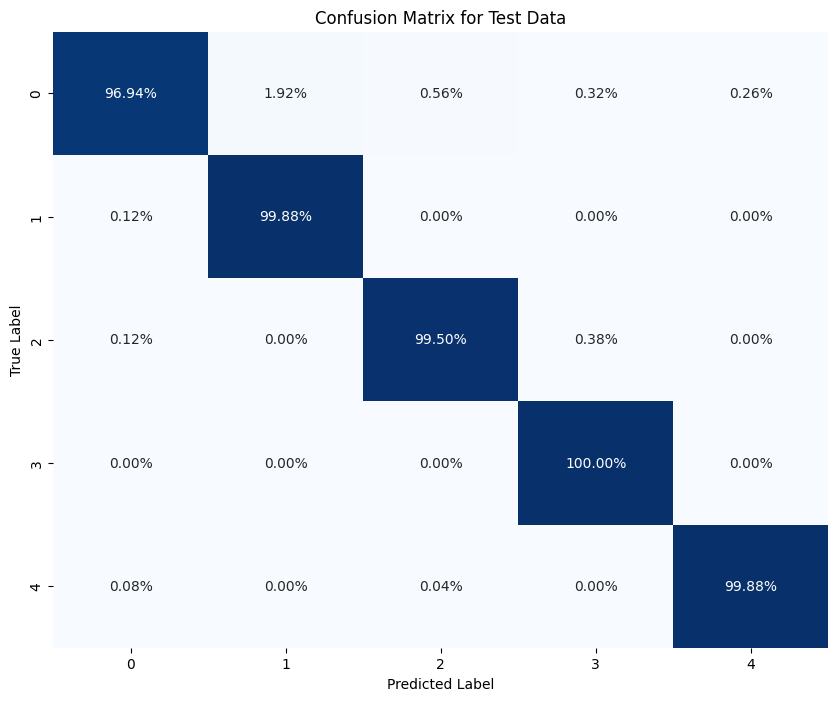

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix as before
conf_matrix = confusion_matrix(y_test_classes_, y_pred_test_classes_)

# Compute percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy
test_accuracy = accuracy_score(y_test_classes_, y_pred_test_classes_)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.99


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test_classes_, y_pred_test_classes_):
    accuracy = accuracy_score(y_test_classes_, y_pred_test_classes_)
    precision = precision_score(y_test_classes_, y_pred_test_classes_, average='micro')
    recall = recall_score(y_test_classes_, y_pred_test_classes_, average='micro')
    f1 = f1_score(y_test_classes_, y_pred_test_classes_, average='micro')
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Example usage:
evaluate_model(y_test_classes_, y_pred_test_classes_)

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-score: 0.99
